In [7]:
[1] *len(x_2)

[1, 1, 1, 1, 1, 1]

In [10]:
x_2

[1, 2, 3, 4, 2, 1, 1, 1, 1, 1, 1, 1]

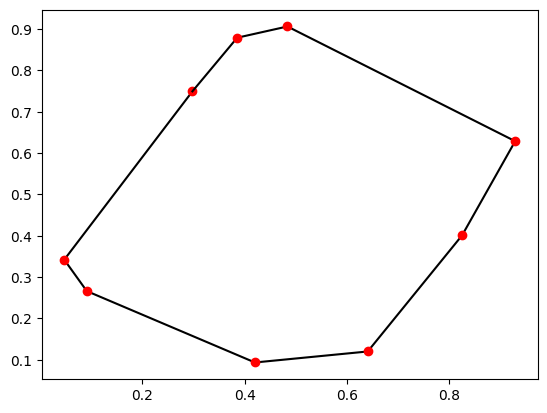

In [48]:
import random
import matplotlib.pyplot as plt
import math
# Количество вершин многоугольника
N = 20

# Генерируем случайные точки на плоскости
points = [(random.uniform(0, 1), random.uniform(0, 1)) for i in range(N)]

# Сортируем точки по углу относительно первой точки
def angle(point):
    return (180 / 3.1415) * math.atan2(point[1] - points[0][1], point[0] - points[0][0])

points = sorted(points, key=angle)

# Построение многоугольника
polygon = []
for i in range(N):
    polygon.append(points[i])
    while len(polygon) > 2 and (polygon[-1][0] - polygon[-2][0]) * (polygon[-2][1] - polygon[-3][1]) > (polygon[-2][0] - polygon[-3][0]) * (polygon[-1][1] - polygon[-2][1]):
        polygon.pop(-2)

# Отображаем многоугольник на графике
for i in range(len(polygon)):
    plt.plot([polygon[i][0], polygon[(i + 1) % len(polygon)][0]], [polygon[i][1], polygon[(i + 1) % len(polygon)][1]], color='black')
    plt.plot(polygon[i][0], polygon[i][1], 'o', color='red')

plt.show()

In [1013]:
N = 10
def graham_scan(points):
    start = min(points, key=lambda p: (p[0], p[1]))

    sorted_points = sorted(points, key=lambda p: math.atan2(p[1] - start[1], p[0] - start[0]))

    stack = [start]
    for p in sorted_points:
        while len(stack) > 1 and (p[0]-stack[-1][0])*(stack[-1][1]-stack[-2][1])-(stack[-1][0]-stack[-2][0])*(p[1]-stack[-1][1]) > 0:
            stack.pop()
        stack.append(p)

    return stack
 

def get_convex_hull(x_limits: list[int], y_limits: list[int]) -> (int, np.array):
    x_s = np.random.uniform(low = x_limits[0], high = x_limits[1], size = N)
    y_s = np.random.uniform(low = y_limits[0], high = y_limits[1], size = N)
    points = np.column_stack((x_s, y_s))
    return (graham_scan(points), points)

In [1053]:
def support_func(A,B, d: np.array) -> np.array:
        max_id_point_A = np.argmax(np.dot(A, d))
        max_id_point_B = np.argmax(np.dot(B, -d))
        sum_Minkovskiy = A[max_id_point_A] - B[max_id_point_B]
        return sum_Minkovskiy
support_func(poly_1, poly_2, np.array([0, -1]))

array([-0.53657172, -1.03606714])

In [1221]:
num_shot = 0

In [1244]:
poly_1, points_a = get_convex_hull([0,1], [0,1])
poly_2, points_b = get_convex_hull([0.5,2], [0.5,1.25])

LAST_POINT: [ 0.0149377  -0.02368108]
[[-0.55621416 -0.31473217]
 [ 0.25348955  0.19601788]
 [ 0.22475571 -1.01850906]]


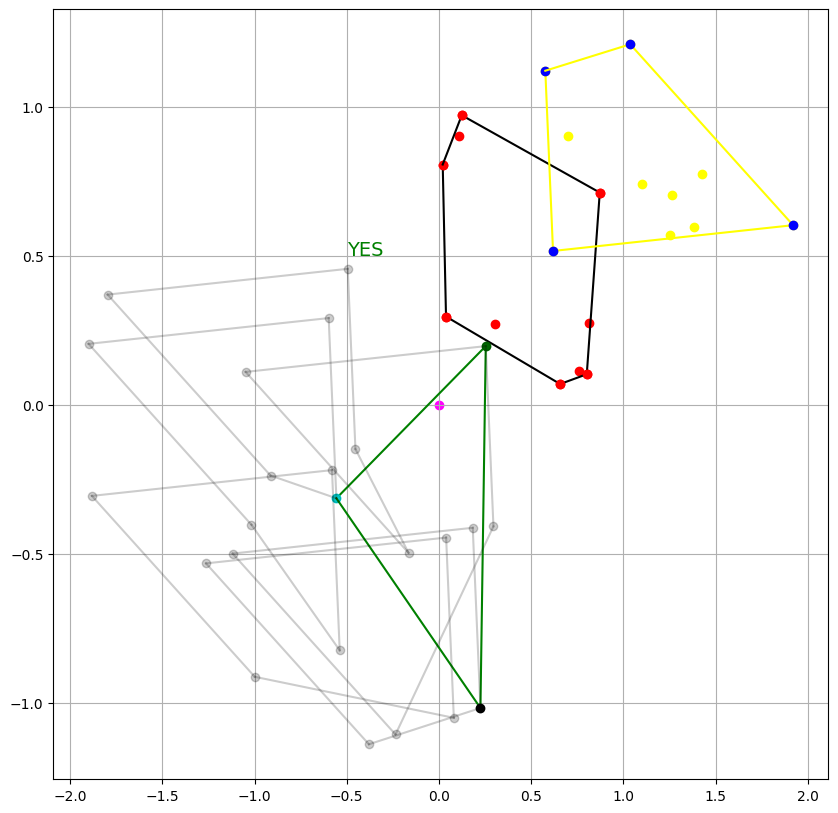

In [1245]:
plt.scatter(points_a[:, 0], points_a[:, 1], color = 'red')
plt.scatter(points_b[:, 0], points_b[:, 1], color = 'yellow')
distance = 10 ** 8
num_shot += 1

for i in range(len(poly_1)):
    plt.plot([poly_1[i][0], poly_1[(i + 1) % len(poly_1)][0]], [poly_1[i][1], poly_1[(i + 1) % len(poly_1)][1]], color='black')
    plt.plot(poly_1[i][0], poly_1[i][1], 'o', color='red')
    
for i in range(len(poly_2)):
    plt.plot([poly_2[i][0], poly_2[(i + 1) % len(poly_2)][0]], [poly_2[i][1], poly_2[(i + 1) % len(poly_2)][1]], color='yellow')
    plt.plot(poly_2[i][0], poly_2[i][1], 'o', color='blue')

inters, triangl, last_point = GJK(poly_1, poly_2, np.array([-1, 1]), None)

colors = {0 : 'cyan', 1: 'green', 2: 'black'}
for i in range(len(triangl)):
    plt.plot([triangl[i][0], triangl[(i + 1) % len(triangl)][0]], [triangl[i][1], triangl[(i + 1) % len(triangl)][1]], color='green')
    plt.plot(triangl[i][0], triangl[i][1], 'o', color=colors[i])

plt.scatter(0, 0, color = 'magenta')
print(triangl)

# ll_pp = 0.13993078189069988/ np.sqrt(last_point[0]**2 + last_point[1]**2) * last_point
# ll_pp_2 = 0.0829611413266744/ np.sqrt(last_point[0]**2 + last_point[1]**2) * last_point




# plt.plot([0, last_point[0]], [0, last_point[1]], linewidth = 3, color = 'blue')
# n_ab = [(triangl[1] - triangl[0])[1], -(triangl[1] - triangl[0])[0]]
# r = abs(n_ab[0]*triangl[1][0] + n_ab[1]*triangl[1][1]) / np.sqrt(n_ab[0]**2 + n_ab[1]**2)
# angles = np.linspace(0, 2 * np.pi, 10000)
# xs = r * np.cos(angles)
# ys = r * np.sin(angles)
# plt.plot(xs, ys, color = 'magenta')

# plt.scatter(0.01194722, 0.08302773, color = 'red')

#plt.plot([triangl[0][0], -0.33634406], [triangl[0][1],  0.1118136 ], color = 'black')

# print(last_point)

aux = []
for i in range(len(poly_1)):
    for j in range(len(poly_2)):
        aux.append(poly_1[i] - poly_2[j])
for i in range(len(aux)):
    pass
    plt.plot([aux[i][0], aux[(i + 1) % len(aux)][0]], [aux[i][1], aux[(i + 1) % len(aux)][1]], color='black', alpha = 0.2)
    plt.plot(aux[i][0], aux[i][1], 'o', color='black', alpha = 0.2)

# poly_1_c = np.array([
# [0.123734,0.024988],
# [0.123734,0.024988],
# [0.702277,0.179919],
# [0.937105,0.291228],
# [0.925432,0.350115],
# [0.627627,0.838148],
# [0.487839,0.96779],
# [0.305091,0.833072],
# ])

# poly_2_c = np.array([
# [0.518554,1.00466],
# [0.545682,0.748366],
# [0.66706,0.70247],
# [0.928627,0.6197],
# [1.16446,0.633301],
# [1.62985,0.731338],
# [1.7452,1.20827],
# ])

# for i in range(len(poly_1_c)):
#     plt.plot([poly_1_c[i][0], poly_1_c[(i + 1) % len(poly_1_c)][0]], [poly_1_c[i][1], poly_1_c[(i + 1) % len(poly_1_c)][1]], color='magenta')
#     plt.plot(poly_1_c[i][0], poly_1_c[i][1], 'o', color='black')
    
# for i in range(len(poly_2_c)):
#     plt.plot([poly_2_c[i][0], poly_2_c[(i + 1) % len(poly_2_c)][0]], [poly_2_c[i][1], poly_2_c[(i + 1) % len(poly_2_c)][1]], color='blue')
#     plt.plot(poly_2_c[i][0], poly_2_c[i][1], 'o', color='green')


# plt.xlim([-1.0, 1.0])
# plt.ylim([-1.0, 1.0])
plt.grid()
plt.rcParams["figure.figsize"] = (10, 10)
if (inters):
    plt.text(-0.5, 0.5, "YES", fontsize = 14, color = 'green')
else:
    plt.text(-0.5, 0.5, "NO", fontsize = 14, color = 'red')
plt.savefig(f"shot_{num_shot}.png")
plt.show()

In [1071]:
def GJK(A: np.array, B: np.array, d: np.array, triangle_2point = None):
    global distance
    def support_func(d: np.array) -> np.array:
        max_id_point_A = np.argmax(np.dot(A, d))
        max_id_point_B = np.argmax(np.dot(B, -d))
        sum_Minkovskiy = A[max_id_point_A] - B[max_id_point_B]
        return sum_Minkovskiy
    triangle = np.zeros((3, 2))
    if not (triangle_2point):
        direction = d
        triangle[0] = A[0] - B[0]#support_func(direction)
        triangle[1] = support_func(-triangle[0])
        edge_triangle = triangle[0] - triangle[1]
        #last_point = triangle[0] * (edge_triangle[0]**2 + edge_triangle[1]**2) - edge_triangle * np.dot(triangle[0], edge_triangle)
        #last_point = np.cross(edge_triangle, np.cross(triangle[0], edge_triangle))
        last_point = - (triangle[1] * np.dot(edge_triangle,edge_triangle) - edge_triangle  * np.dot(edge_triangle,triangle[1]))
        print("LAST_POINT:", last_point)
        triangle[2] = support_func(last_point)
        AB = triangle[0] - triangle[1]
        CB = triangle[1] - triangle[2]
        AC = triangle[2] - triangle[0]
        if (np.sign(np.cross(AB, triangle[0])) == np.sign(np.cross(CB, triangle[1])) == np.sign(np.cross(AC, triangle[2]))): #?????
            return (True, triangle, last_point)
        #else:
            #pass
            #return (False, triangle, last_point)
    else:
        print(triangle_2point)
        triangle[0] = triangle_2point[0]
        triangle[1] = triangle_2point[1]
        edge_triangle = triangle[0] - triangle[1]
        last_point = - (triangle[1] * np.dot(edge_triangle,edge_triangle) - edge_triangle  * np.dot(edge_triangle,triangle[1]))
        triangle[2] = support_func(last_point)
        AB = triangle[0] - triangle[1]
        CB = triangle[1] - triangle[2]
        AC = triangle[2] - triangle[0]
        if (np.sign(np.cross(AB, triangle[0])) == np.sign(np.cross(CB, triangle[1])) == np.sign(np.cross(AC, triangle[2]))): #?????
            return (True, triangle, last_point)
    
    id_triangle_curr_distance, type_return = get_min_edge_origin(triangle)
    id_triangle = id_triangle_curr_distance[0]
    curr_distance = id_triangle_curr_distance[1]
    print("a&",curr_distance)
    if type_return == False:
        print("point far!")
        return (False, triangle, last_point)
    if curr_distance < distance:
        print(curr_distance)
        distance = curr_distance
        # vec_dict = [[0, norm(triangle[0])], [1, norm(triangle[1])], [2, norm(triangle[2])]]
        # sort_vect_dict = sorted(vec_dict, key=lambda p: p[1])
        # first_near_zero = triangle[sort_vect_dict[0][0]]
        # second_near_zero = triangle[sort_vect_dict[1][0]]
        first_near_zero = triangle[id_triangle[0]]
        second_near_zero = triangle[id_triangle[1]]
        return GJK(A, B, None, [first_near_zero, second_near_zero])
        
#         triangle[0] = triangle[1]
#         triangle[1] = triangle[2]
        
#         # triangle[0] = triangle[2]
#         # triangle[1] = support_func(-triangle[0])
    else:
        return (False, triangle, last_point)

In [817]:
def norm(vec):
    return np.sqrt(vec[0]**2 + vec[1]**2 )

In [818]:
def find_distance(point_1, point_2):
    A = point_1[1] - point_2[1]
    B = point_2[0] - point_1[0]
    C = -A * point_1[0] - B * point_1[1]
    return abs(C) / np.sqrt(A**2 + B**2)

def get_min_edge_origin(triangle):
    candidates  = []
    AB = triangle[0] - triangle[1]
    CB = triangle[1] - triangle[2]
    AC = triangle[2] - triangle[0]
    if np.sign(np.dot(AB, triangle[0])) != np.sign(np.dot(AB, triangle[1])):
        candidates.append([(0, 1), find_distance(triangle[0], triangle[1])])
    if np.sign(np.dot(CB, triangle[1])) != np.sign(np.dot(CB, triangle[2])):
        candidates.append([(1, 2), find_distance(triangle[1], triangle[2])])
    if np.sign(np.dot(AC, triangle[2])) != np.sign(np.dot(AC, triangle[0])):
        candidates.append([(2, 0), find_distance(triangle[2], triangle[0])])
    if len(candidates) == 0:
        vec_dict = [[0, norm(triangle[0])], [1, norm(triangle[1])], [2, norm(triangle[2])]]
        sort_vect_dict = sorted(vec_dict, key=lambda p: p[1])
        first_near_zero = triangle[sort_vect_dict[0][0]]
        return (first_near_zero, False)
    else:
        print(candidates)
        min_candidates = min(candidates, key=lambda p: p[1])
        return (min_candidates, True)

In [271]:
direction = np.array([-1, 1])

In [286]:
np.dot(poly_1, direction)

array([-0.01590758, -0.01590758, -0.60526098,  0.02653911,  0.92597728,
        0.90137524])

In [276]:
poly_1

[array([0.84037442, 0.06711981]),
 array([0.84037442, 0.06711981]),
 array([0.91278591, 0.35778817]),
 array([0.26161029, 0.89755566]),
 array([0.0925236 , 0.20030509]),
 array([0.23737462, 0.152465  ])]

In [459]:
a = [(triangl[1] - triangl[0])[1], -(triangl[1] - triangl[0])[0]]

In [460]:
a

[-0.5148076525047894, -1.7170263765378322]

In [464]:
b = triangl[1] - triangl[0]

In [466]:
np.dot(b,a)

0.0

In [474]:
r = abs(n_ab[0]*triangl[1][0] + n_ab[1]*triangl[1][1]) / np.sqrt(n_ab[0]**2 + n_ab[1]**2)


In [475]:
r

0.33179366041041874

In [472]:
triangle[1]

array([0., 0.])

In [600]:
aux_2 = np.array(aux)

In [ ]:
aux_2

array([[-0.83352092, -0.62490034],
       [-0.83352092, -0.62490034],
       [-1.08338122, -1.14415487],
       [-0.28655336, -1.1569778 ],
       [-0.17654302, -1.08873379],
       [-0.15450222, -0.8447319 ],
       [-0.83352092, -0.62490034],
       [-0.83352092, -0.62490034],
       [-1.08338122, -1.14415487],
       [-0.28655336, -1.1569778 ],
       [-0.17654302, -1.08873379],
       [-0.15450222, -0.8447319 ],
       [-0.63101139, -0.60175682],
       [-0.63101139, -0.60175682],
       [-0.88087169, -1.12101135],
       [-0.08404383, -1.13383428],
       [ 0.0259665 , -1.06559026],
       [ 0.04800731, -0.82158838],
       [-0.33634406,  0.1118136 ],
       [-0.33634406,  0.1118136 ],
       [-0.58620436, -0.40744093],
       [ 0.2106235 , -0.42026387],
       [ 0.32063384, -0.35201985],
       [ 0.34267464, -0.10801797],
       [-1.12367604,  0.18810153],
       [-1.12367604,  0.18810153],
       [-1.37353633, -0.33115299],
       [-0.57670847, -0.34397593],
       [-0.46669814,

In [ ]:
aux_2[aux_2 > 0]

array([0.12946962, 0.14715469, 0.06219211, 0.12946962, 0.14715469,
       0.06219211, 0.01194722, 0.08302773, 0.01194722, 0.08302773,
       0.07907832, 0.30695771, 0.32464278, 0.2396802 , 0.26131796,
       0.26131796, 0.25736854, 0.07523567, 0.27668947, 0.27668947,
       0.27274006, 0.09060718, 0.07503492, 0.07503492, 0.07108551])

In [ ]:
np.dot(triangl[2], last_point / np.sqrt(last_point[0]**2 + last_point[1]**2))

0.13993078189069988

In [ ]:
np.dot([ 0.01194722,  0.08302773], last_point / np.sqrt(last_point[0]**2 + last_point[1]**2))

0.0829611413266744

In [ ]:
triangl[2]

array([-0.38433391,  0.26131796])

In [ ]:
last_point / np.sqrt(last_point[0]**2 + last_point[1]**2)

array([0.28719421, 0.95787238])

In [ ]:
np.dot([1, 1], poly_1)

ValueError: shapes (2,) and (6,2) not aligned: 2 (dim 0) != 6 (dim 0)

In [ ]:
mm = {0 : 'asda', 1 : 'asdasda'}

In [ ]:
mm = [[0, 5], [1, 12], [2, 1]]

In [ ]:
mm_2 = sorted(mm, key=lambda p: p[1])

In [ ]:
mm_2

[[2, 1], [0, 5], [1, 12]]

In [ ]:
def ff(a =None):
    if a:
        print('hello')
    return

ff()

In [1141]:
import pandas as pd

In [1142]:
d = pd.DataFrame(points_a)

In [1143]:
print(d.to_string(index=False))

       0        1
0.453276 0.426022
0.770300 0.424022
0.062785 0.284751
0.160998 0.425069
0.372385 0.148687
0.709243 0.866673
0.563942 0.981093
0.861076 0.216889
0.780108 0.669158
0.386264 0.070147


In [1144]:
d_b = pd.DataFrame(points_b)

In [1145]:
print(d_b.to_string(index=False))

       0        1
1.898769 0.786875
1.485430 1.077083
0.500494 1.022067
1.835663 0.895048
0.867111 1.197718
1.684772 0.928358
1.488109 0.822823
0.857383 1.168524
0.914914 0.702625
1.271340 1.167906


In [966]:
poly_1

[array([0.4961271 , 0.37339689]),
 array([0.4961271 , 0.37339689]),
 array([0.94149532, 0.70106869]),
 array([0.91327153, 0.86353408]),
 array([0.42555728, 0.9533765 ]),
 array([0.24606287, 0.48282022])]